In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Zoo.csv")

In [5]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df.shape

(101, 18)

In [8]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

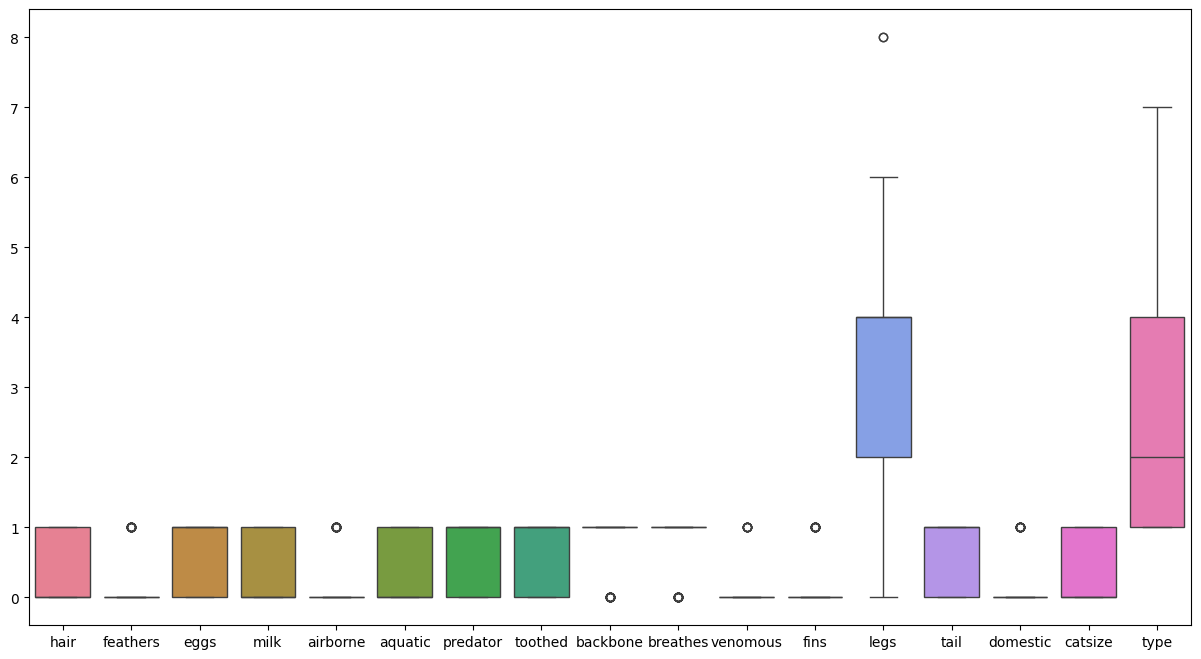

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.show()

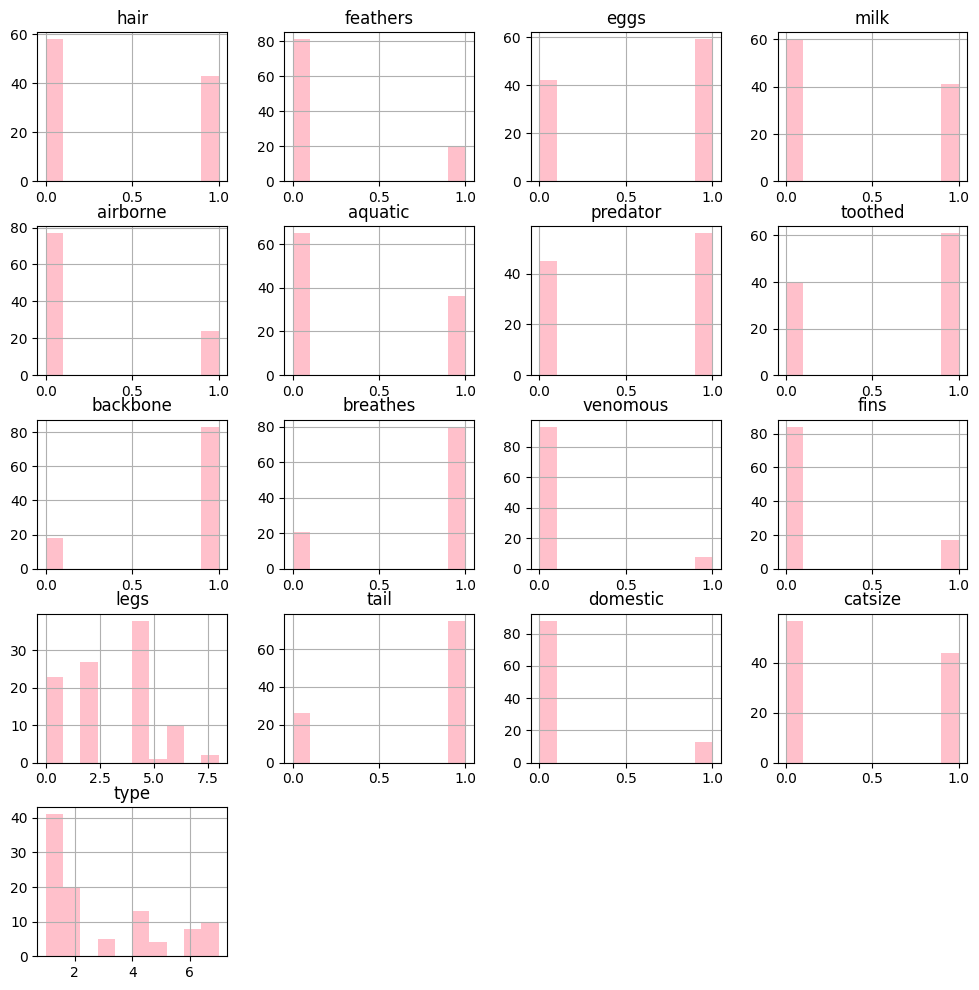

In [10]:
df.hist(figsize=(12,12),color='pink')
plt.show()

<Axes: xlabel='type', ylabel='count'>

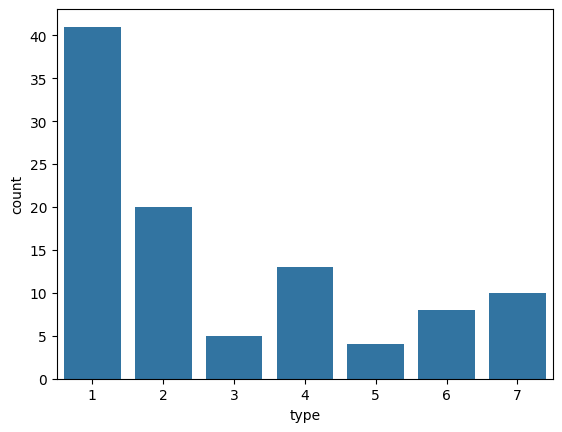

In [13]:
sns.countplot(x='type',data=df)

### splitting data into train and test split

In [14]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,1:17]
y=df.iloc[:,17]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=36)


In [15]:
df.head(1)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


In [16]:
import numpy as np
n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

### Grid search cv

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [18]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


### Visualizing cv results

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

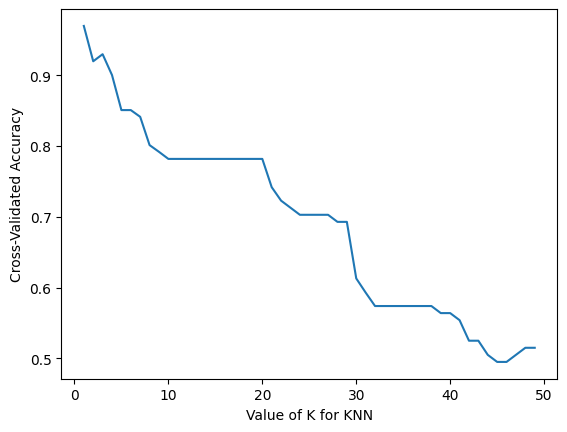

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

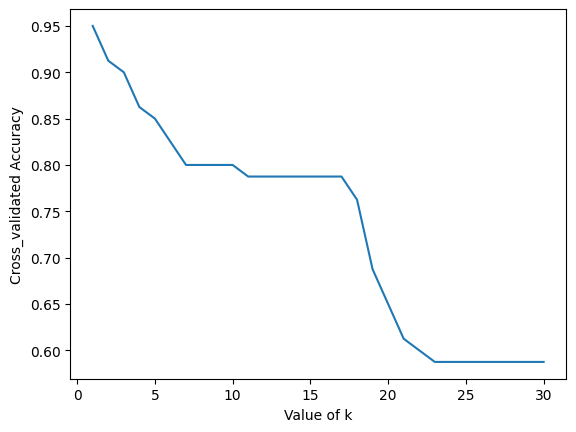

In [20]:

%matplotlib inline
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range,k_scores)
plt.xlabel('Value of k')
plt.ylabel('Cross_validated Accuracy')
plt.show()

In [21]:
model_final = KNeighborsClassifier(n_neighbors=1)
model_final.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
ypred=model_final.predict(x_test)
y_pred=pd.DataFrame(ypred)
y_pred.head(10)

,0
0,4
1,2
2,4
3,1
4,1
5,3
6,1
7,6
8,7
9,3


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9523809523809523

In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.79      0.86      0.81        21
weighted avg       0.93      0.95      0.94        21

Accuracy: 0.9523809523809523


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Interview Questions:

## 1. What are the key hyperparameters in KNN?

Key Hyperparameters in KNN

The key hyperparameter in KNN is the number of neighbors (k). This determines how many nearest neighbors are considered when making a prediction. A smaller k can lead to overfitting, while a larger k can lead to underfitting.

Other important considerations include:

* Distance Metric: The choice of distance metric (e.g., Euclidean, Manhattan, Minkowski) affects how neighbors are identified.

* Weighting: Assigning weights to neighbors can improve accuracy, especially when giving more weight to closer neighbors.

* Algorithm: Efficient algorithms like Ball Tree or KD Tree can speed up neighbor search, especially for large datasets.

By carefully tuning these hyperparameters and considering the specific dataset and problem, you can optimize the performance of the KNN algorithm.

## 2. What distance metrics can be used in KNN?

When choosing the right distance metric for your KNN model, you've got a few options:

* Euclidean Distance: This is the most common choice, measuring the straight-line distance between two points. It's great for continuous numerical data.

* Manhattan Distance: This one calculates distance by summing the absolute differences between coordinates. It's useful when you want to ignore the direction of differences.

* Minkowski Distance: A flexible metric that generalizes both Euclidean and Manhattan distances. It's like a superpowered version that can be adjusted to different situations.

* Hamming Distance: This is perfect for categorical data, especially binary data. It counts the number of positions where two data points differ.

* Cosine Similarity: This measures the similarity between two non-zero vectors. It's often used for text data and high-dimensional data.

The best distance metric depends on the nature of your data. Experimenting with different metrics can help you find the one that works best for your specific problem.